In [4]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

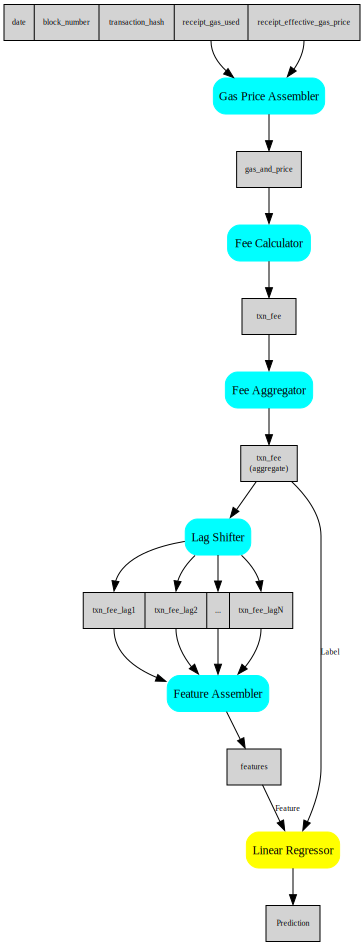

In [3]:
from graphviz import Source

# horizontal graph: add rankdir=LR after orientation

dot_graph = """
digraph {
  orientation=portrait;
  node [shape=box style="filled" fontsize=12]

  sch0[label="<f0> date|<f1> block_number
  |<f2> transaction_hash|<f3> receipt_gas_used|
  <f4> receipt_effective_gas_price",
  shape=record,fontsize=8];


  node1[label="Gas Price Assembler", style="filled,rounded", color=cyan];
  sch0:f3 -> node1;
  sch0:f4 -> node1;
  sch1[label="<f0> gas_and_price",shape=record,fontsize=8];
  node1 -> sch1:f0;

  node2[label="Fee Calculator", style="filled,rounded", color=cyan];
  sch1:f0 -> node2;
  sch2[label="<f0> txn_fee",shape=record,fontsize=8];
  node2 -> sch2:f0;

  node3[label="Fee Aggregator", style="filled,rounded", color=cyan];
  sch2:f0 -> node3;
  sch2a[label="<f0> txn_fee \\n (aggregate)",shape=record,fontsize=8];
  node3 -> sch2a:f0;

  node4[label="Lag Shifter", style="filled,rounded", color=cyan];
  sch2a:f0 -> node4;
  sch3[label="<f0> txn_fee_lag1|<f1> txn_fee_lag2|<f2> ...|<f3> txn_fee_lagN",shape=record,fontsize=8];
  node4 -> sch3:f0;
  node4 -> sch3:f1;
  node4 -> sch3:f2;
  node4 -> sch3:f3;

  node5[label="Feature Assembler", style="filled,rounded", color=cyan];
  sch3:f0 -> node5;
  sch3:f1 -> node5;
  sch3:f2 -> node5;
  sch3:f3 -> node5;
  
  sch4[label="<f0> features",shape=record,fontsize=8];
  node5 -> sch4:f0;

  node6[label="Linear Regressor", style="filled,rounded", color=yellow];
  sch4:f0 -> node6 [label="Feature",fontsize=8];
  sch2a:f0 -> node6 [label="Label",fontsize=8];
  sch5[label="<f0> Prediction",shape=record,fontsize=8];
  node6 -> sch5:f0;
}
"""

src = Source(dot_graph)
src
